In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from common import Fonts, Colors, add_twitter_handle, add_source

In [53]:
def goal_diff_by_year(year):
    df = pd.read_csv("data/matches_" + str(year) + ".csv")
    df = df[(df["stage"] == "First Stage") | (df["stage"] == "Group Matches")]
    df["diff"] = (df["home_score"] - df["away_score"]).abs()

    return (
        df.groupby("diff")
        .agg(count=("match_number", "count"))
        .rename(columns={"count": str(year)})
    )

In [54]:
df = (
    pd.concat([goal_diff_by_year(x) for x in range(1991, 2024, 4)], axis=1)
    .fillna(0)
    .astype(int)
)
df.index = df.index.astype(int)
df = df.T
df

diff,0,1,2,3,4,5,6,7,8,9,10,11,13
1991,1,4,3,4,3,2,0,0,1,0,0,0,0
1995,2,6,5,1,0,2,0,1,1,0,0,0,0
1999,4,3,7,3,1,1,4,1,0,0,0,0,0
2003,2,6,3,9,0,2,2,0,0,0,0,0,0
2007,6,6,5,1,2,3,0,0,0,0,0,1,0
2011,3,13,3,3,2,0,0,0,0,0,0,0,0
2015,10,15,5,0,2,1,1,0,0,1,1,0,0
2019,3,16,8,4,3,1,0,0,0,0,0,0,1
2023,3,8,2,2,1,1,1,0,0,0,0,0,0


In [55]:
df["total"] = df.sum(axis=1)
df[df.columns] = df[df.columns].apply(lambda x: x / x['total'], axis=1)
df = df.drop(columns=["total"])
df

diff,0,1,2,3,4,5,6,7,8,9,10,11,13
1991,0.055556,0.222222,0.166667,0.222222,0.166667,0.111111,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
1995,0.111111,0.333333,0.277778,0.055556,0.000000,0.111111,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000
1999,0.166667,0.125000,0.291667,0.125000,0.041667,0.041667,0.166667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
2003,0.083333,0.250000,0.125000,0.375000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,0.250000,0.250000,0.208333,0.041667,0.083333,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000
2011,0.125000,0.541667,0.125000,0.125000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.277778,0.416667,0.138889,0.000000,0.055556,0.027778,0.027778,0.000000,0.000000,0.027778,0.027778,0.000000,0.000000
2019,0.083333,0.444444,0.222222,0.111111,0.083333,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778
2023,0.166667,0.444444,0.111111,0.111111,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 4800x3200 with 0 Axes>

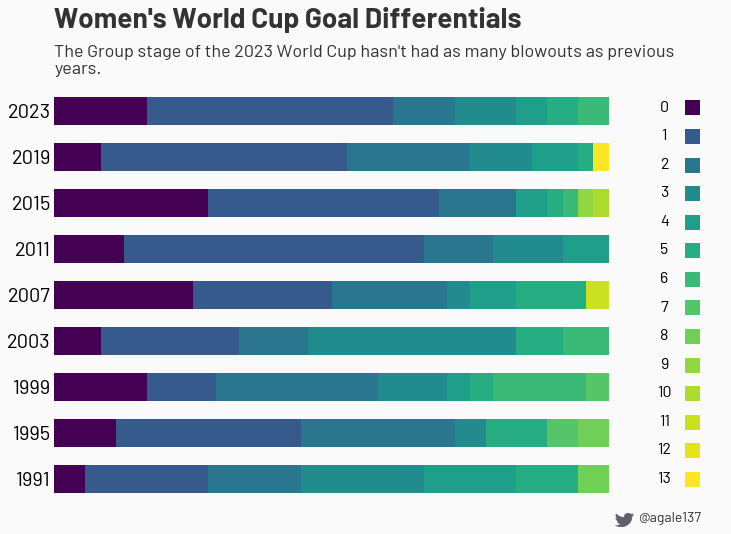

In [130]:
# Setup
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
bottom = np.zeros(len(df.index))
for label, data in df.iteritems():
    p = ax.barh(
        df.index,
        data,
        0.6,
        label=label,
        left=bottom,
        color=cm.viridis(math.sqrt(label) / math.sqrt(13)),
    )
    bottom += data

# Ticks and axes
ax.tick_params(axis="both", which="both", length=0)
ax.set_xticks([])
for label in ax.get_yticklabels():
    fp = Fonts.BARLOW
    fp.set_size(20)
    label.set_fontproperties(fp)
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

# Legend
for i in range(0, 14):
    ax.scatter(1.15, (13-i)*8.7/14, color=cm.viridis(math.sqrt(i) / math.sqrt(13)), marker='s', s=200)
    ax.text(1.1, (13-i)*8.7/14, str(i), ha="center",va="center",fontproperties=Fonts.BARLOW, size=16)

# Title
ax.set_title(
    "Women's World Cup Goal Differentials",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
    x=0,
    y=1.1,
)

# Subtitle
ax.text(
    0,
    8.8,
    "The Group stage of the 2023 World Cup hasn't had as many blowouts as previous\nyears.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.77, y=0.1, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/world_cup_goal_diffs.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)